# __Девопсная домашка по трансформерам__

## __Описание__

![img](https://d35w6hwqhdq0in.cloudfront.net/521712556725591dcacec5bbdb32e047.png)

Ваш главный квест на эту домашку - сделать свой простой сервис на трансформерах. Вот прям целый сервис: начиная с данных и заканчивая графическим интерфейсом где-то в интернете. Ваш сервис может решать либо одну из предложенных ниже задач, либо любую другую (что-то более дорогое лично вам).

__Стандартная задача: классификатор статей.__ Нужно построить сервис который принимает название статьи и её abstract, и выдаёт наиболее вероятную тематику статьи: скажем, физика, биология или computer science. В интерфейсе должно быть можно ввести отдельно abstract, отдельно название -- и увидеть топ-95%* тематик, отсортированных по убыванию вероятности. Если abstract не ввели, нужно классифицировать статью только по названию. Ниже вас ждут инструкции и данные именно для этой задачи.

<details><summary><u> Что значит Топ-95%?</u></summary>
    Нужно выдавать темы по убыванию вероятности, пока их суммарная вероятность не превысит 95%. В зависимости от предсказанной вероятности, это может быть одна или более тем. Например, если модель предсказала вероятности [4%, 20%, 60%, 2%, 14%], нужно вывести 3 топ-3 класса. Если один из классов имеет вероятность 96%, достаточно вывести один этот класс.
</details>

Альтернативно, вы можете отважиться сделать что-то своё, на данных из интернета или своих собственных. В вашей задаче обязательно должно быть _оправданное_ использование трансформеров. Использовать ML чтобы переводить часовые пояса - плохой план.

Achtung: трансформеры круты, но не всемогущи. Далеко не любую задачу можно решить ощутимо лучше рандома. Для калибровки, вот несколько примеров решаемых задач (всё кликабельно):


<details><summary> - <b>[medium]</b> <u>Сгенерировать youtube-комментарии по _ссылке_ на видео</u></summary>
    Всё просто, юзер постит ссылку на видео - вы его комментируете. Можно заранее обусловиться что видео только на английском или на русском. Нужно сочинить _несколько_ комментариев. Kudos если вместе с основным комментарием вы порождаете юзернеймы и-или ответы на него.
    
    Датасет для файнтюна можно [взять с kaggle](https://www.kaggle.com/tanmay111/youtube-comments-sentiment-analysis/data?select=UScomments.csv) или [собрать самостоятельно](https://towardsdatascience.com/how-to-build-your-own-dataset-of-youtube-comments-39a1e57aade).
    
    В качестве основной модели можно использовать [GPT-2 large](https://huggingface.co/gpt2-large). Вот как её файнтюнить: https://tinyurl.com/gpt2-finetune-colab . Если хотите больше - можно взять что-то из творчества https://huggingface.co/EleutherAI . Например, вот [тут](https://tinyurl.com/gpt-j-8bit) есть пример как файнтюнить GPT-J-6B (в 8 раз больше gpt2-large). Однако, этим стоит заниматься уже после того, как у вас заработал базовый сценарий с GPT2-large или даже base.
    
    В итоговом сервисе можно дать пользователю вариировать параметры генерации: температура или top-p, если сэмплинг; beam size и length penalty, если beam search; сколько комментариев сгенерировать, etc. Отдельный респект если ваш код будет выводить комментарий по одному слову, прямо в процессе генерёжки - чтобы пользователь не ждал пока вы настругаете абзац целиком.
</details>

<details><summary> - <b>[medium]</b> <u>Предсказать зарплату по профилю (симулятор Дудя).</u></summary>
    Note: <details> <summary>Причём тут Дудь?</summary> <img src=https://www.meme-arsenal.com/memes/6dd85f126bbab4f9774ced71ffadbcb3.jpg> </details>
    
    Главная сложность задачи - достать хорошие данные. Если хороших данных не случилось - можно и трешовые :) Задание всё-таки про технологии а не про продукт. Для начала можно взять подмножество фичей [отсюда](https://www.kaggle.com/c/job-salary-prediction/data), которые вы можете восстановить из профиля linkedin - название профессии и компании. Название компании лучше заменить на фичи из открытых источников: сфера деятельности, размер, етц.
    
    А дальше файнтюним на этом BERT / T5 и радуемся. Ну или хотя бы смеёмся.
</details>


<details><summary> - <b>[hard]</b> <u>Мнения с географической окраской.</u></summary>
    
    Сервис который принимает на вход тему (хэштег или ключевую фразу) и рисует карту мира, где в каждом регионе показано, с какой эмоциональной окраской о ней высказываются в социальных сетях. В качестве социальной сети можно взять VK/twitter, в случая VK ожидается детализация не по странам, а по городам стран бывшего СССР.
    
    В минимальном варианте достаточно определять тональность твита в режиме "позитивно-негативно", зафайнтюнив условный BERT/T5 на одном из десятков {vk/twitter} sentiment classification датасетах. Географическую привязку можно получить из профиля пользователя. А дальше осталось собрать данные по странам и регионам.

</details>


<details><summary> - <b>[very hard]</b> <u>Найти статью википедии по фото предмета статьи</u></summary>

    Чтобы можно было сфотать какую-нибудь неведомую чешуйню на телефон и получить сумму человеческих знаний о ней в форме вики-статьи.
    
    В качестве функции потерь можно использовать contrastive loss. Этот лосс неплохо описан в статье [CLIP](https://arxiv.org/abs/2103.00020). Вместо обучения с нуля предлагается взять, собственно, CLIP (text transformer + image transformer) отсюда: https://huggingface.co/docs/transformers/model_doc/clip. Модель будет сопоставлять каждой статьи и 
    
    Данные для этого квеста можно собрать через API википедии: вики-статьи о предметах обычно содержит фото этого объекта и, собственно, текст статьи. Советуем собрать как минимум 10^4 пар картинка-статья. Картинки советуем дополнительно аугментировать как минимум стандартными картиночными аугами, как максимум - поиском похожих картинок в интернете / imagenet-е по тому же CLIP image encoder-у, но с исходными весами.
    
    На время отладки интерфейса рекомендуем ограничиться небольшим списком статьей: условно, кошечки, собачки, птички, гаечные ключи, машины. Как станет понятно что оно работает "на кошках", можно расширить этот список до "всех статей таких-то категорий". Эмбединги статей лучше предпосчитать в файл. Если долго их перебирать - можно (но необязательно) воспользоваться быстрым поиском соседей, e.g. [faiss](https://github.com/facebookresearch/faiss) HNSW.
</details>


## __Как научить классификатор статей?__

Данные для классификации статей можно скачать, например, [отсюда](https://www.kaggle.com/neelshah18/arxivdataset/). В этих данных есть заголовок и abstract статьи, а ещё поле __"tag"__: тематика статьи [по таксономии arxiv.org](https://arxiv.org/category_taxonomy). Вы можете расширить выборку, добавив в неё статьи за 2019-н.в. годы. Для этого можно [использовать arxiv API](https://github.com/lukasschwab/arxiv.py), самостоятельно распарсить arxiv с помощью [beautifulsoup](https://pypi.org/project/beautifulsoup4/), или поискать другие датасеты на kaggle, huggingface, etc.

Когда данные собраны (и аккуратно нарезаны на train/test), можно что-нибудь и обучить. Мы советуем использовать для этого библиотеку `transformers`. Советуем, но не заставляем: если хочется, можно взять [fairseq roberta](https://github.com/pytorch/fairseq/blob/main/examples/roberta), [google t5](https://github.com/google-research/text-to-text-transfer-transformer) или даже написать всё с нуля.

Мы разбирали transformers на [семинаре](https://lk.yandexdataschool.ru/courses/2025-spring/7.1332-machine-learning-2/classes/13138/), за любой дополнительной информацией - смотрите [документации HF](https://huggingface.co/docs).

Начать лучше с простой модели, такой как [`distilbert-base-cased`](https://huggingface.co/distilbert-base-cased). Когда вы будете понимать, какие значения accuracy ожидать от базовой модели, можно поискать что-то получше. Два очевидных направления улучшения: (1) сильнее модель T5 или deberta v3, или (2) близкие данные, например взять модель которую предобучили на том же arxiv. И то и другое удобно [искать здесь](https://huggingface.co/models).

## __Научили, и что теперь?__

А теперь нужно сделать так, чтобы ваша обученная модель отвечала на запросы в интернете. Как и на прошлом этапе, вы можете сделать это кучей разных способов: от простого [streamlit](https://streamlit.io/) / [gradio](https://gradio.app/), минуя [TorchServe](https://pytorch.org/serve/) с [Triton/TensorRT](https://developer.nvidia.com/nvidia-triton-inference-server), и заканчивая экспортом модели в javascript с помощью [TensorFlow.js](https://www.tensorflow.org/js/tutorials) / [ONNX.js](https://github.com/elliotwaite/pytorch-to-javascript-with-onnx-js).

На [семинаре](https://lk.yandexdataschool.ru/courses/2025-spring/7.1332-machine-learning-2/classes/13138/) мы разбирали основные вещи про то как работает streamlit и как сделать простое приложение с его помощью.

Общая идея streamlit: вы [описываете](https://docs.streamlit.io/library/get-started/create-an-app) внешний вид приложения на питоне с помощью примитивов (кнопки, поля, любой html) -- а потом этот код выполняется на сервере и обслуживает каждого пользователя в отдельном процессе.

__Для отладки__ можно запустить приложение локально, открыв консоль рядом с app.py:
* `pip install streamlit`
* `streamlit run app.py --server.port 8080`
* открыть в браузере localhost:8080, если он не открылся автоматически


## __Deployment time!__

В этот раз вам нужно не просто написать код, __но и поднять ваше приложение с доступом из интернета__. И да, вы угадали, это можно сделать несколькими способами: [HuggingFace spaces](https://huggingface.co/spaces) (данный способ разбирали на [семинаре](https://lk.yandexdataschool.ru/courses/2025-spring/7.1332-machine-learning-2/classes/13138/)), [Streamlit Cloud](https://streamlit.io/cloud), а ещё вы можете купить или арендовать свой собственный сервер и захоститься там.

Проще всего захостить на HF spaces, для этого вам нужно [зарегистрироваться](https://huggingface.co/join) и найти [меню создания нового приложения](https://huggingface.co/new-space). Название и лицензию можно выбрать на своё усмотрение, главное чтобы Space SDK был Streamlit, а доступ - public.

Как создали - можно редактировать ваше приложение прямо на сайте, для этого откройте приложение и перейдите в Files and versions, и там в правом углу добавьте нужные файлы.

На минималках вам потребуется 2 файла:
- `app.py`, о котором мы говорили выше
- `requirements.txt`, где вы укажете нужные вам библиотеки

Вы можете разместить там же веса вашей обученной модели, любые необходимые данные, дополнительные файлы, ...

После каждого изменения файлов, ваше приложение соберётся (обычно 1-5 минут) и будет доступно уже во вкладке App. Ну или не соберётся и покажет вам, где оно сломалось. И вуаля, теперь у вас есть ссылка, которую можно показать ~друзьям~ ассистентам курса и кому угодно в интернете.

__Удобная работа с кодом.__ Пока у вас 2 файла, их легко редактивровать прямо в интерфейсе HF spaces. Если же у вас дюжина файлов, вам может быть удобнее редактировать их в любимом vscode/pycharm/.../emacs. Чтобы это не вызывало мучений, можно пользоваться HF spaces как git репозиторием ([подробности тут](https://huggingface.co/docs/hub/spaces#manage-app-with-github-actions)).

## __Что нужно сдать__

Вы сдаёте проект, который будет проверяться вручную, то что ожидается от каждого проекта:
- Текстовое сопровождение вашего конкретного проекта в любом удобно читаемом формате (pdf, html, текст в lk, ...) - что за задачу вы решали, где/как брали данные, какие использовали модели, какие проводили эксперименты, ...
- Ссылка на веб интерфейс, где можно протестировать демо вашего проекта - обязательно проверяйте что работает не только у вас (с другого устройства и из под incognito режима)
- Код обучения вашей модели (желательно ipynb с заполненными ячейками и не стёртыми выходами, переведённый в pdf / html), но если вы обучали не в ноутбуке, то сдавайте код в виде файла / архива файлов / git ссылки с readme.md описанием того как именно проходило обучение с помощью этого кода.

## __Оценка__

Мы будем оценивать проект целиком, включая идею и реализацию. Максимум за проект можно получить 10 баллов, но мы оставляем ещё до 5 баллов, которые можем выдать как бонусные за особенно интересные и качественно реализованные проекты.

### __Тонкие места, за которые могут быть снижения баллов:__

__1. Скорость работы.__

По умолчанию, streamlit будет выполняет весь ваш код на каждое действие пользователя. То есть всякий раз, когда пользователь меняет что-то в тексте, оно будет заново загружать модель. Чтобы исправить это безобразие, вы можете закэшировать подготовленную модель в `@st.cache`. Подробности в [семинаре](https://lk.yandexdataschool.ru/courses/2025-spring/7.1332-machine-learning-2/classes/13138/), а также [читайте тут](https://docs.streamlit.io/library/advanced-features/caching).

__Как будет оцениваться:__

Вы не обязаны пользоваться кэшированием, но ваше приложение не должно неоправдано тормозить дольше, чем на 3 секунды. "Оправданые" тормоза это те, которые вы явно оправдали текстом в ЛМС :)

-----

__2. Понятный фронтенд.__

Наколеночный графический интерфейс с семинара - пример того, как скорее не надо делать интерфейс приложения. Как надо - сложный вопрос, причём настолько сложный, что есть даже [Школа Разработки Интерфейсов](https://academy.yandex.ru/schools/frontend). Но для начала:

- Выводить нужно человекочитаемый текст, а не просто JSON с индексами и метаданными.
- Пользователю должно быть понятно, куда и какие данные вводить. Пустые текстовые поля в вакууме - плохой тон.
- Сервис не должен падать с не_отловленными ошибками. Даже если пользователь введёт неправильные/пустые данные, нужно это обработать и написать, где произошла ошибка.

__Как будет оцениваться:__

Для полного балла достаточно соблюсти эти три правила и специально не стрелять себе в ногу.

-----

__3. Код обучения и инференса.__

Сдавая проект мы будем также получать от вас код проекта (как обучения ваших моделей, так и код веб интерфейса).

__Как будет оцениваться:__

Код не будет отдельно проверяться как часть задания, поэтому пишите как хотите, однако - в спорных ситуациях мы оставляем за собой право проверить ваш код, за чем могут последовать потенциальные снижения баллов при любых нарушениях.


In [1]:
!pip install kagglehub

In [2]:
# # предложенная часть
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# file_path = "arxivData.json"

# # Load the dataset
# df = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "neelshah18/arxivdataset",
#     file_path
# )

# print("First 5 records:", df.head())

In [3]:
# df.to_json("data/arxivData_saved.json", orient='records', indent=2)
# print("Файл сохранен как arxivData_saved.json")

In [4]:
### парсинг с архива
#!pip install arxiv #не получилось через arxiv, постоянно падает
# import requests
# import feedparser
# import time
# import json
# from datetime import datetime, timedelta

In [5]:
# def generate_monthly_intervals(start_year, end_year):
#     intervals = []
#     current = datetime(start_year, 1, 1, 0, 0)
#     last = datetime(end_year, 12, 31, 23, 59)

#     while current <= last:
#         # начало месяца
#         start_str = current.strftime("%Y%m%d%H%M")
#         # конец месяца
#         next_month = (current.replace(day=28) + timedelta(days=4)).replace(day=1)
#         end_of_this_month = next_month - timedelta(minutes=1)
#         if end_of_this_month > last:
#             end_of_this_month = last

#         end_str = end_of_this_month.strftime("%Y%m%d%H%M")
#         intervals.append((start_str, end_str))

#         # след месяц
#         current = next_month

#     return intervals


# def fetch_arxiv_data_for_interval(
#     start_date,
#     end_date,
#     query="all",
#     chunk_size=100,
#     max_articles=10_000,
#     max_empty_pages=3,
#     pause_seconds=3,
#     error_step=10
# ):
#     base_url = "http://export.arxiv.org/api/query"
#     articles = []
#     start_index = 0
#     empty_page_count = 0
#     processed_count = 0

#     search_query = f"{query} AND submittedDate:[{start_date} TO {end_date}]"

#     while True:
#         params = {
#             "search_query": search_query,
#             "start":        start_index,
#             "max_results":  chunk_size,
#             "sortBy":       "submittedDate",
#             "sortOrder":    "descending"
#         }

#         time.sleep(pause_seconds)
#         try:
#             response = requests.get(base_url, params=params, timeout=20)
#         except Exception as e:
#             print(f"\nОшибка сети при start={start_index}: {e}")
#             start_index += error_step
#             time.sleep(5)
#             continue

#         if response.status_code != 200:
#             print(f"\nHTTP {response.status_code} при start={start_index}: {response.text[:200]}...")
#             start_index += error_step
#             time.sleep(5)
#             continue

#         feed = feedparser.parse(response.text)
#         if not feed.entries:
#             empty_page_count += 1
#             print(f"\nПолучена пустая страница при start={start_index}. Пустых подряд={empty_page_count}")
#             start_index += error_step
#             if empty_page_count >= max_empty_pages:
#                 print("Слишком много пустых страниц подряд — завершаем блок.")
#                 break
#             continue
#         else:
#             empty_page_count = 0

#         for entry in feed.entries:
#             # обработка даты публикации
#             if hasattr(entry, "published_parsed") and entry.published_parsed:
#                 pub_year = entry.published_parsed.tm_year
#                 pub_month = entry.published_parsed.tm_mon
#                 pub_day = entry.published_parsed.tm_mday
#             else:
#                 pub_str = getattr(entry, "published", "")
#                 try:
#                     dt = datetime.strptime(pub_str, "%Y-%m-%dT%H:%M:%SZ") if pub_str else None
#                 except Exception:
#                     dt = None
#                 pub_year = dt.year if dt else 1900
#                 pub_month = dt.month if dt else 1
#                 pub_day = dt.day if dt else 1

#             entry_id = entry.get("id", "")
#             short_id = entry_id.rsplit("/", 1)[-1]

#             authors_list = []
#             if hasattr(entry, "authors"):
#                 for a in entry.authors:
#                     authors_list.append({"name": a.get("name", "")})

#             links_list = []
#             if hasattr(entry, "links"):
#                 for lnk in entry.links:
#                     link_data = {
#                         "rel":  lnk.get("rel", ""),
#                         "href": lnk.get("href", "")
#                     }
#                     if "title" in lnk:
#                         link_data["title"] = lnk["title"]
#                     links_list.append(link_data)

#             tags_list = []
#             if hasattr(entry, "tags"):
#                 for t in entry.tags:
#                     tags_list.append({
#                         "term": t.get("term"),
#                         "scheme": t.get("scheme", "http://arxiv.org/schemas/atom"),
#                         "label": None
#                     })

#             article = {
#                 "author":  str(authors_list),
#                 "day":     pub_day,
#                 "id":      short_id,
#                 "link":    str(links_list),
#                 "month":   pub_month,
#                 "summary": entry.get("summary", "").replace("\n", " "),
#                 "tag":     str(tags_list),
#                 "title":   entry.get("title", "").replace("\n", " "),
#                 "year":    pub_year
#             }

#             articles.append(article)
#             processed_count += 1
#             print(f"Обработано статей в текущем блоке: {processed_count}", end="\r")

#             if processed_count >= max_articles:
#                 print(f"\nДостигнут лимит в {max_articles} статей для этого блока.")
#                 break
#         else:
#             start_index += chunk_size
#             continue
        
#         # достигнут max_articles
#         break

#     return articles


# def fetch_arxiv_data(
#     start_year=2019,
#     end_year=2023,
#     query="all",
#     chunk_size=100,
#     max_articles_per_block=10_000,
#     max_empty_pages=3,
#     pause_seconds=3,
#     error_step=10
# ):
#     """
#     Разбивает диапазон [start_year..end_year] помесячно,
#     для каждого месяца скачивает статьи при помощи fetch_arxiv_data_for_interval,
#     Все результаты собирает в один список и сохраняет в JSON.
#     """

#     # [(start_date_str, end_date_str), ...] для каждого месяца.
#     monthly_intervals = generate_monthly_intervals(start_year, end_year)

#     all_articles = []
#     total_processed = 0

#     for (start_date, end_date) in monthly_intervals:
#         print(f"\nСкачиваем статьи за интервал {start_date} — {end_date}")
#         block_articles = fetch_arxiv_data_for_interval(
#             start_date=start_date,
#             end_date=end_date,
#             query=query,
#             chunk_size=chunk_size,
#             max_articles=max_articles_per_block,
#             max_empty_pages=max_empty_pages,
#             pause_seconds=pause_seconds,
#             error_step=error_step
#         )
#         all_articles.extend(block_articles)
#         total_processed += len(block_articles)
#         print(f"  Интервал {start_date} — {end_date}: скачано {len(block_articles)} статей.")
#         print(f"  Всего набрано уже: {total_processed}.")

#     # Сохраняем:
#     file_name = f"arxiv_{start_year}_to_{end_year}.json"
#     with open(file_name, "w", encoding="utf-8") as f:
#         json.dump(all_articles, f, ensure_ascii=False, indent=4)

#     print(f"\nИтого сохранено статей: {len(all_articles)} в файл {file_name}")


# if __name__ == "__main__":
#     fetch_arxiv_data(
#         start_year=2019,
#         end_year=2023,
#         query="all",
#         chunk_size=200,
#         max_articles_per_block=10000,
#         max_empty_pages=10,
#         pause_seconds=2,
#         error_step=50
#     )

In [6]:
# # собираем все json в один
# import json

# def load_json(filename):
#     with open(filename, 'r', encoding='utf-8') as f:
#         return json.load(f)

# def save_unique_articles(file_names, output_file):
#     combined_data = []
#     for file in file_names:
#         combined_data.extend(load_json(file))
    
#     # Удаление дубликатов
#     seen = set()
#     unique_data = []
#     for article in combined_data:
#         title = article.get('title', '')
#         summary = article.get('summary', '')
#         key = (title.strip(), summary.strip())
        
#         if key not in seen:
#             seen.add(key)
#             unique_data.append(article)
    
#     with open(output_file, 'w', encoding='utf-8') as f:
#         json.dump(unique_data, f, indent=4, ensure_ascii=False)

# if __name__ == "__main__":
#     input_files = ['data/arxivData_saved.json', 'arxiv_2019_present.json', 'arxiv_2019_to_2023.json']
#     output_file = 'combined.json'
    
#     save_unique_articles(input_files, output_file)
#     print(f"Объединенный файл сохранен как {output_file}")

Общая статистика:
Всего статей: 207009
Период публикаций: 1993-2025

Пример данных:
                                              author  day            id  \
0  [{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...    1  1802.00209v1   
1  [{'name': 'Ji Young Lee'}, {'name': 'Franck De...   12  1603.03827v1   
2  [{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...    2  1606.00776v2   

                                                link  month  \
0  [{'rel': 'alternate', 'href': 'http://arxiv.or...      2   
1  [{'rel': 'alternate', 'href': 'http://arxiv.or...      3   
2  [{'rel': 'alternate', 'href': 'http://arxiv.or...      6   

                                             summary  \
0  We propose an architecture for VQA which utili...   
1  Recent approaches based on artificial neural n...   
2  We introduce the multiresolution recurrent neu...   

                                                 tag  \
0  [{'term': 'cs.AI', 'scheme': 'http://arxiv.org...   
1  [{'term': 'cs.CL', 'sc

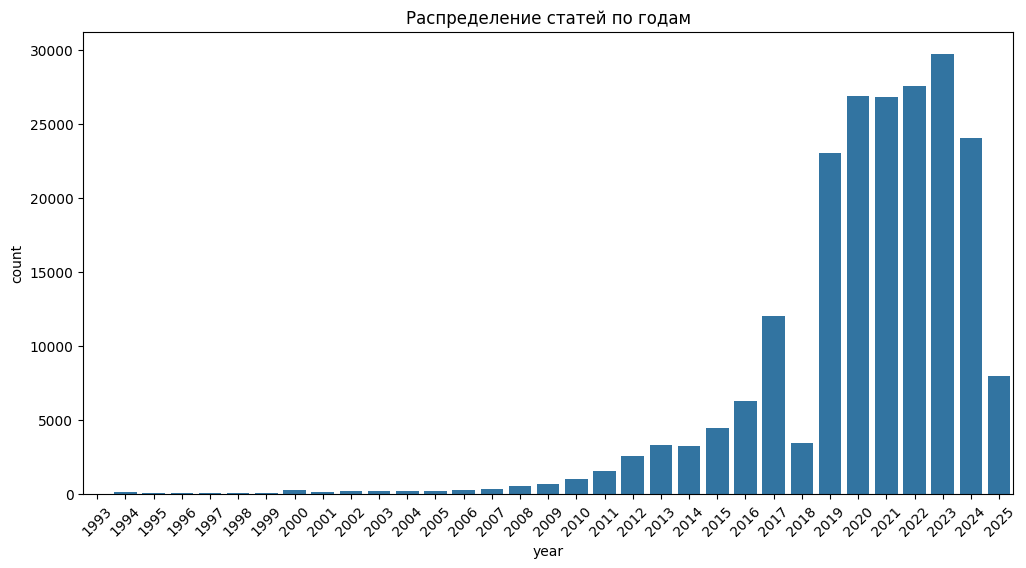

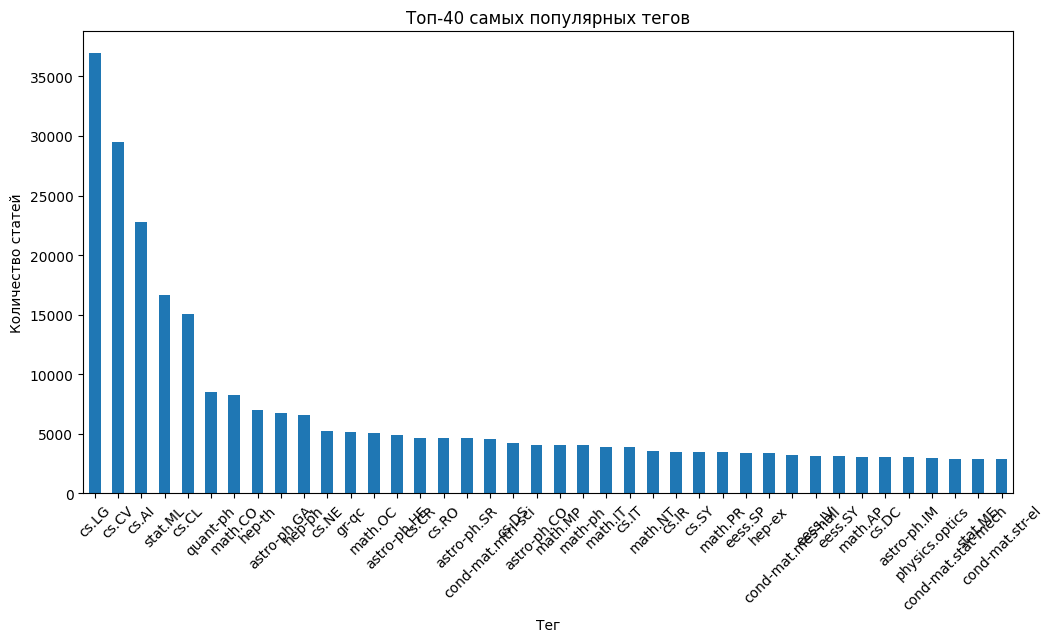

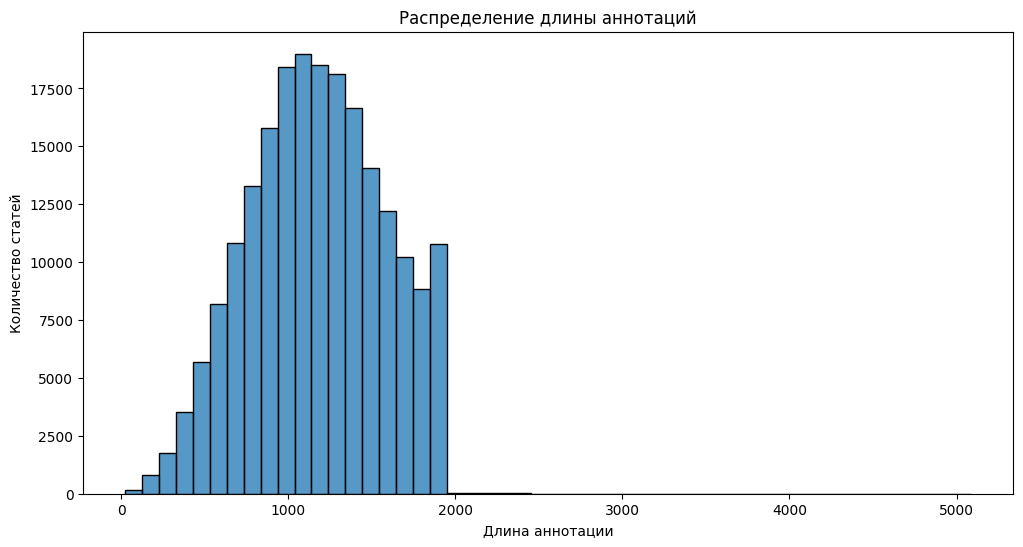

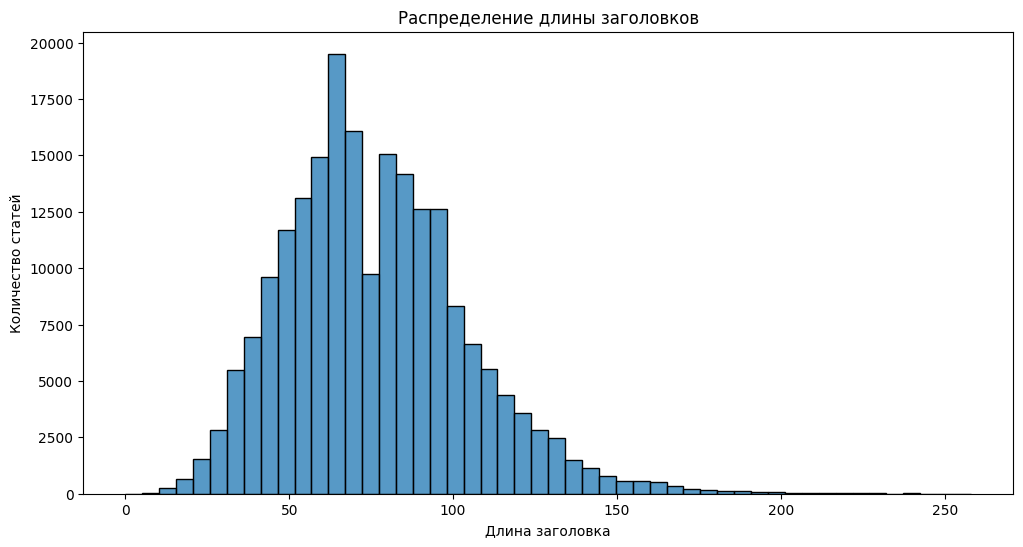


Пропущенные данные:
Series([], dtype: int64)


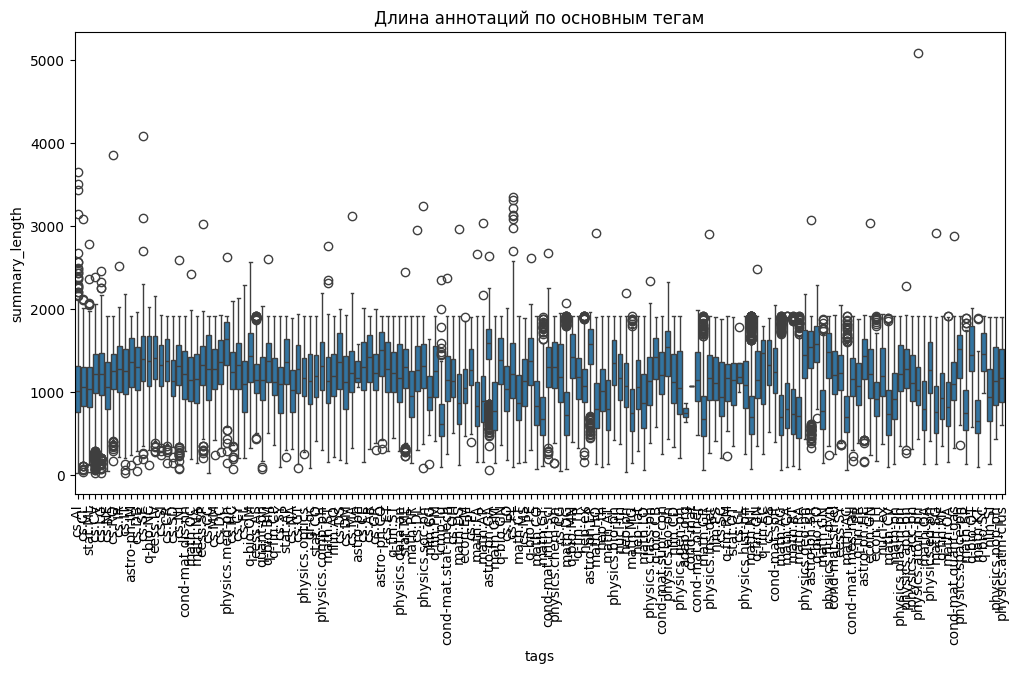

In [7]:
### какой никакой EDA
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

with open('data/combined.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

for col in ['author', 'tag', 'link']:
    df[col] = df[col].apply(literal_eval)

print("Общая статистика:")
print(f"Всего статей: {len(df)}")
print(f"Период публикаций: {df['year'].min()}-{df['year'].max()}")
print("\nПример данных:")
print(df.head(3))

# Анализ временных меток
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.title('Распределение статей по годам')
plt.xticks(rotation=45)
plt.show()

# Анализ тегов
df['tags'] = df['tag'].apply(lambda x: [item['term'] for item in x])
tag_counts = pd.Series([tag for sublist in df['tags'] for tag in sublist]).value_counts()

plt.figure(figsize=(12, 6))
tag_counts.head(40).plot(kind='bar')
plt.title('Топ-40 самых популярных тегов')
plt.xlabel('Тег')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.show()

# Анализ текстовых полей
df['summary_length'] = df['summary'].apply(len)
df['title_length'] = df['title'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['summary_length'], bins=50)
plt.title('Распределение длины аннотаций')
plt.xlabel('Длина аннотации')
plt.ylabel('Количество статей')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['title_length'], bins=50)
plt.title('Распределение длины заголовков')
plt.xlabel('Длина заголовка')
plt.ylabel('Количество статей')
plt.show()

# Анализ пропущенных данных
missing_data = df.isnull().sum()
print("\nПропущенные данные:")
print(missing_data[missing_data > 0])

# Анализ связи тегов с другими параметрами
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['tags'].apply(lambda x: x[0]), y=df['summary_length'])
plt.title('Длина аннотаций по основным тегам')
plt.xticks(rotation=90)
plt.show()

In [8]:
!pip install scikit-multilearn

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import iterative_train_test_split
import matplotlib.pyplot as plt
import numpy as np
MIN_SAMPLES = 750
OTHER_CLASS = 'Other'

In [10]:
df = df[['title', 'summary', 'tags']].copy()

def process_tags(tags):
    processed = []
    for tag in tags:
        if tag in rare_tags:
            processed.append(OTHER_CLASS)
        else:
            processed.append(tag)
    seen = set()
    unique_tags = [x for x in processed if not (x in seen or seen.add(x))]
    
    return unique_tags

In [11]:

all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = pd.Series(all_tags).value_counts()
rare_tags = tag_counts[tag_counts < MIN_SAMPLES].index.tolist()

df['processed_tags'] = df['tags'].apply(process_tags)

# теги с <2 наблюдениями
new_tag_counts = pd.Series([tag for sublist in df['processed_tags'] for tag in sublist]).value_counts()
problematic_tags = new_tag_counts[new_tag_counts < 2].index.tolist()
if problematic_tags:
    print(f"Удаляем {len(problematic_tags)} проблемных тегов:")
    df = df[~df['processed_tags'].apply(lambda x: any(tag in problematic_tags for tag in x))]

df['stratify_column'] = df['processed_tags'].apply(
    lambda x: x[0] if x and x[0] != OTHER_CLASS else OTHER_CLASS
)


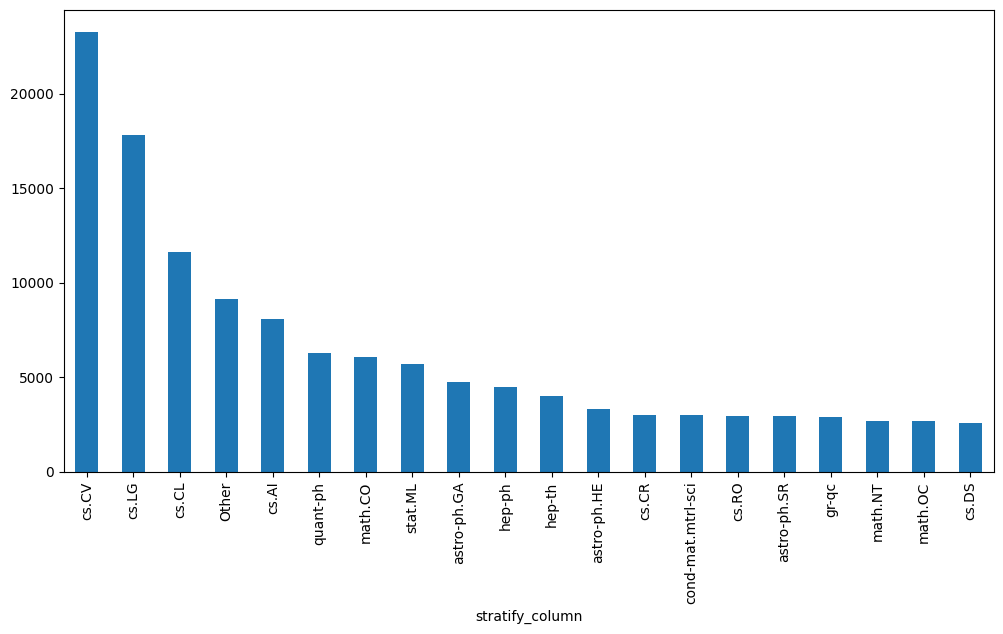

In [12]:
plt.figure(figsize=(12,6))
df['stratify_column'].value_counts().head(20).plot(kind='bar')
plt.title('')
plt.show()


In [13]:
X_train, X_val = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['stratify_column']
)

In [14]:

print("\nПосле обработки:")
print(f"Всего примеров: {len(df)}")
print(f"Уникальных тегов: {new_tag_counts.shape[0]}")
print(f"Примеры распределения в трейне:")
print(X_train['processed_tags'].apply(lambda x: x[0] if x else None).value_counts().head(5))

print(X_train[['title', 'summary', 'processed_tags']].head(4))

print(X_val[['title', 'summary', 'processed_tags']].head(2))


После обработки:
Всего примеров: 207009
Уникальных тегов: 101
Примеры распределения в трейне:
processed_tags
cs.CV    18617
cs.LG    14265
cs.CL     9286
Other     7309
cs.AI     6450
Name: count, dtype: int64
                                                    title  \
21229   Weight-Based Variable Ordering in the Context ...   
23107      Understanding physics from interconnected data   
146540  AnchorGAE: General Data Clustering via $O(n)$ ...   
197367  Multiset permutation generation by transpositions   

                                                  summary    processed_tags  
21229   Dom/wdeg is one of the best performing heurist...           [cs.AI]  
23107   Metal melting on release after explosion is a ...    [cs.CV, Other]  
146540  Since the representative capacity of graph-bas...           [cs.LG]  
197367  This paper proposes a new algorithm for genera...  [math.CO, Other]  
                                                    title  \
190868  Disorder effects on the 

In [15]:
!pip install transformers

In [16]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertConfig

/home/aliaksandr/miniconda3/envs/EDA/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# кол-во классов
all_tags = []
for df in [X_train, X_val]:
    all_tags.extend(df['processed_tags'].explode().tolist())

unique_tags = sorted(list(set(all_tags)))
num_classes = len(unique_tags)
tag_to_idx = {tag: idx for idx, tag in enumerate(unique_tags)}

In [18]:
def tags_to_vector(tags_list):
    vector = np.zeros(num_classes, dtype=np.float32)
    for tag in tags_list:
        vector[tag_to_idx[tag]] = 1.0
    return vector

In [19]:
y_train = X_train['processed_tags'].apply(tags_to_vector)
y_val = X_val['processed_tags'].apply(tags_to_vector)

In [20]:
class ArxivDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        
        encoding = tokenizer(
            text,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        label_tensor = torch.tensor(label, dtype=torch.float)
        if label_tensor.sum() > 0:
            label_tensor = label_tensor / label_tensor.sum()
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label_tensor
        }

In [21]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="multi_label_classification"
)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [22]:
def create_data_loader(df, labels, batch_size=108):
    dataset = ArxivDataset(
        texts=df.apply(lambda x: x['title'] + ' ' + x['summary'], axis=1),
        labels=labels
    )
    return DataLoader(dataset, batch_size=batch_size)

train_loader = create_data_loader(X_train, y_train)
val_loader = create_data_loader(X_val, y_val, batch_size=108)

In [23]:
import torch
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [24]:
def run_train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    train_progress = tqdm(train_loader, desc="Training", leave=False)
    for batch in train_progress:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        train_progress.set_postfix(loss=f"{loss.item():.4f}")
    return total_loss / len(train_loader)

def run_val_epoch(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    val_progress = tqdm(val_loader, desc="Validation", leave=False)
    with torch.no_grad():
        for batch in val_progress:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()
            val_progress.set_postfix(loss=f"{loss.item():.4f}")
    return total_loss / len(val_loader)

def plot_metrics(epochs, train_losses, val_losses, lrs, save_plot=False, filename='training_metrics.png'):
    clear_output(wait=True)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].plot(epochs, train_losses, marker='o', label='Train Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Training Loss')
    axs[0].legend()
    
    axs[1].plot(epochs, val_losses, marker='o', color='orange', label='Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Validation Loss')
    axs[1].legend()
    
    axs[2].plot(epochs, lrs, marker='o', color='green', label='Learning Rate')
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Learning Rate')
    axs[2].set_title('Learning Rate per Epoch')
    axs[2].legend()
    
    plt.tight_layout()
    
    if save_plot:
        fig.savefig(filename)
    
    plt.show()

In [25]:
from IPython.display import clear_output
#!pip install ipywidgets

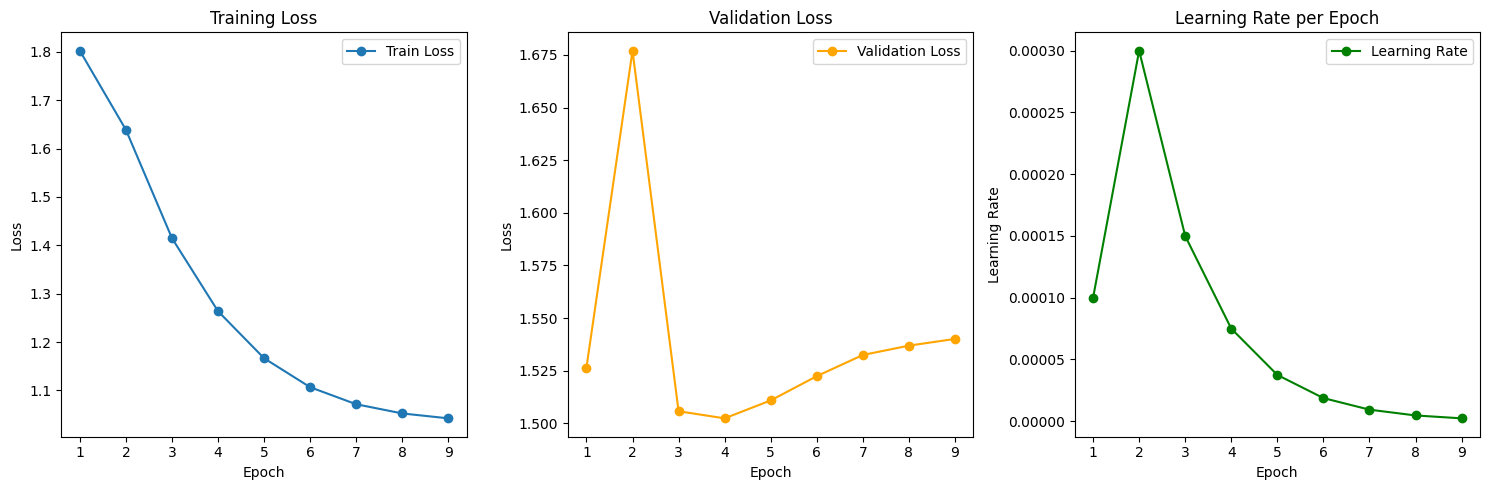

Epoch 9, Train Loss: 1.0421, Val Loss: 1.5401, LR: 0.000002


Training:   1%|██▏                                                                                                                                                    | 22/1534 [00:21<24:57,  1.01it/s, loss=1.0921]

In [ ]:
#multiclass
import torch
import torch.nn as nn
import torch.nn.functional as F

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="single_label_classification"
)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def soft_cross_entropy_loss(logits, target):
    log_probs = F.log_softmax(logits, dim=1)
    loss = -(target * log_probs).sum(dim=1).mean()
    return loss

criterion = soft_cross_entropy_loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



def lr_lambda(epoch):
    if epoch == 0:
        return 1.0
    elif epoch == 1:
        return 3.0
    else:
        return 3.0 * (1/2) ** (epoch - 1)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)


train_losses = []
val_losses = []
lrs = []
num_epochs = 10
best_val_loss = float('inf')

for epoch in range(num_epochs):
    avg_train_loss = run_train_epoch(model, train_loader, optimizer, criterion, device)
    avg_val_loss = run_val_epoch(model, val_loader, criterion, device)
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    lrs.append(current_lr)
    
    plot_metrics(list(range(1, epoch+2)), train_losses, val_losses, lrs, save_plot = True)
    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, LR: {current_lr:.6f}')
    
    
    
    # Сохранение текущей модели
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses,
        'lrs': lrs
    }, 'last_model.pt')
    
    # Сохранение лучшей модели по вал
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'lrs': lrs
        }, 'best_model.pt')
    
    scheduler.step()

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertConfig, DistilBertForSequenceClassification
import torch.nn.functional as F
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load('best_model2.pt', map_location=device)
num_classes = 101

config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="single_label_classification"
)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

def evaluate_model(model, val_loader, device):
    all_preds = []
    all_labels = []
    val_progress = tqdm(val_loader, desc="Validation")
    
    with torch.no_grad():
        for batch in val_progress:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # преобразуем в индексы
            if labels.dim() == 2 and labels.size(1) == num_classes:
                labels = torch.argmax(labels, dim=1)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    precision, recall, f1, support = precision_recall_fscore_support(
        all_labels, all_preds, average=None, zero_division=0
    )
    accuracy = accuracy_score(all_labels, all_preds)
    
    print("Метрики по классам:")
    for idx, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
        print(f'  Label {idx}: Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}, Support: {s}')
    print(f'\nОбщая Accuracy: {accuracy:.4f}')

evaluate_model(model, val_loader, device)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation: 100%|██████████| 384/384 [02:34<00:00,  2.49it/s]

Метрики по классам:
  Label 0: Precision: 0.6928, Recall: 0.2192, F1: 0.3330, Support: 8116
  Label 1: Precision: 0.8720, Recall: 0.5121, F1: 0.6453, Support: 785
  Label 2: Precision: 0.8684, Recall: 0.7285, F1: 0.7923, Support: 453
  Label 3: Precision: 0.8195, Recall: 0.7548, F1: 0.7859, Support: 1089
  Label 4: Precision: 0.7558, Recall: 0.7525, F1: 0.7541, Support: 695
  Label 5: Precision: 0.5461, Recall: 0.5992, F1: 0.5714, Support: 247
  Label 6: Precision: 0.4855, Recall: 0.9207, F1: 0.6357, Support: 290
  Label 7: Precision: 0.6667, Recall: 0.1429, F1: 0.2353, Support: 168
  Label 8: Precision: 0.6739, Recall: 0.3678, F1: 0.4759, Support: 590
  Label 9: Precision: 0.6126, Recall: 0.6413, F1: 0.6266, Support: 683
  Label 10: Precision: 0.6620, Recall: 0.3730, F1: 0.4772, Support: 126
  Label 11: Precision: 0.6095, Recall: 0.5664, F1: 0.5872, Support: 226
  Label 12: Precision: 0.4471, Recall: 0.2216, F1: 0.2963, Support: 343
  Label 13: Precision: 0.4643, Recall: 0.4362, F1: 0

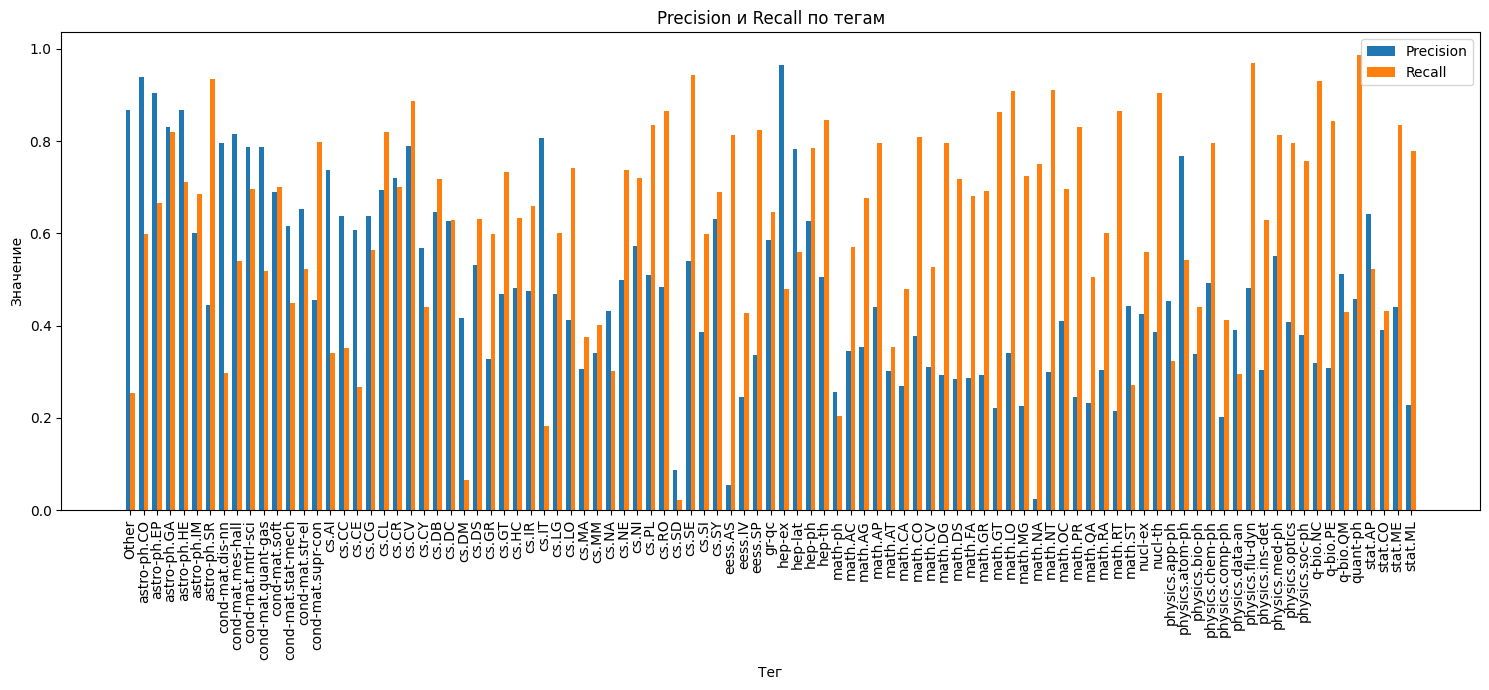

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open("train.json", "r", encoding="utf-8") as file:
    data = json.load(file)

filtered_data = [entry for entry in data if entry["support"] >= 3]

tags = [entry["label_name"] for entry in filtered_data]
precision = [entry["precision"] for entry in filtered_data]
recall = [entry["recall"] for entry in filtered_data]

indices = np.arange(len(tags))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(indices - bar_width/2, precision, bar_width, label="Precision")
ax.bar(indices + bar_width/2, recall, bar_width, label="Recall")

ax.set_xlabel("Тег")
ax.set_ylabel("Значение")
ax.set_title("Precision и Recall по тегам")
ax.set_xticks(indices)
ax.set_xticklabels(tags, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
#multilabel
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.BCEWithLogitsLoss()

def lr_lambda(epoch):
    if epoch == 0:
        return 1.0
    elif epoch == 1:
        return 4.0
    else:
        return 4.0 * (1/2) ** (epoch - 1)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)


train_losses = []
val_losses = []
lrs = []
num_epochs = 10
best_val_loss = float('inf')

for epoch in range(num_epochs):
    avg_train_loss = run_train_epoch(model, train_loader, optimizer, criterion, device)
    avg_val_loss = run_val_epoch(model, val_loader, criterion, device)
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    lrs.append(current_lr)
    
    plot_metrics(list(range(1, epoch+2)), train_losses, val_losses, lrs)
    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, LR: {current_lr:.6f}')
    
    
    
    # Сохранение текущей модели
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses,
        'lrs': lrs
    }, 'last_model.pt')
    
    # Сохранение лучшей модели по вал
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'lrs': lrs
        }, 'best_model.pt')
    
    scheduler.step()

In [ ]:
### проверка моделей
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 101  #750 to other
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="multi_label_classification"
)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)
checkpoint = torch.load("models/003/best_model.pt", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)
model.eval()

In [ ]:
from sklearn.metrics import precision_score, recall_score
def evaluate_model(model, val_loader, device, threshold=0.5):
    model.eval()
    all_preds = []
    all_labels = []
    hits = 0
    total = 0
    top1_hits = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probs = torch.sigmoid(logits)
            
            # Multi-label
            preds = (probs > threshold).int()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
            labels = labels.bool()
            preds = preds.bool()
            batch_hits = (preds & labels).sum(dim=1).bool().sum().item()
            hits += batch_hits
            total += labels.size(0)
            top1_preds = logits.argmax(dim=1)
            top1_hits += (labels.gather(1, top1_preds.unsqueeze(1)) .sum().item())

    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()

    example_accuracy = hits / total
    top1_accuracy = top1_hits / total
    
    precision_per_class = precision_score(all_labels, all_preds, average=None, zero_division=0)
    recall_per_class = recall_score(all_labels, all_preds, average=None, zero_division=0)
    accuracy_per_class = [(all_labels[:, i] == all_preds[:, i]).mean() for i in range(num_classes)]

    micro_precision = precision_score(all_labels, all_preds, average="micro", zero_division=0)
    micro_recall = recall_score(all_labels, all_preds, average="micro", zero_division=0)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall + 1e-8)
    
    macro_precision = precision_score(all_labels, all_preds, average="macro", zero_division=0)
    macro_recall = recall_score(all_labels, all_preds, average="macro", zero_division=0)
    macro_f1 = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall + 1e-8)

    return {
        "example_accuracy": example_accuracy,
        "top1_accuracy": top1_accuracy,
        "precision_per_class": precision_per_class,
        "recall_per_class": recall_per_class,
        "accuracy_per_class": accuracy_per_class,
        "micro_metrics": (micro_precision, micro_recall, micro_f1),
        "macro_metrics": (macro_precision, macro_recall, macro_f1)
    }

In [ ]:
def print_metrics(metrics):
    print(f"Example Accuracy: {metrics['example_accuracy']:.4f}")
    print(f"Top-1 Accuracy: {metrics['top1_accuracy']:.4f}\n")
    
    print("Class\tPrecision\tRecall\tAccuracy")
    for i, (prec, rec, acc) in enumerate(zip(
        metrics["precision_per_class"], 
        metrics["recall_per_class"], 
        metrics["accuracy_per_class"]
    )):
        print(f"{i}\t{prec:.4f}\t\t{rec:.4f}\t{acc:.4f}")
    
    print("\nMicro Metrics:")
    print(f"Precision: {metrics['micro_metrics'][0]:.4f}, Recall: {metrics['micro_metrics'][1]:.4f}, F1: {metrics['micro_metrics'][2]:.4f}")
    
    print("\nMacro Metrics:")
    print(f"Precision: {metrics['macro_metrics'][0]:.4f}, Recall: {metrics['macro_metrics'][1]:.4f}, F1: {metrics['macro_metrics'][2]:.4f}")

metrics = evaluate_model(model, val_loader, device)
print_metrics(metrics)

plt.figure(figsize=(15, 5))
plt.bar(range(num_classes), metrics["precision_per_class"], alpha=0.7, label="Precision")
plt.bar(range(num_classes), metrics["recall_per_class"], alpha=0.7, label="Recall")
plt.xlabel("Class ID")
plt.ylabel("Score")
plt.title("Class-wise Metrics")
plt.legend()
plt.show()

In [ ]:
def predict(texts, model, tokenizer, top_threshold=0.95):
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(
                text,
                max_length=512,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            ).to(device)
            
            outputs = model(**inputs)
            probs = torch.sigmoid(outputs.logits).cpu().numpy().flatten()
            
            # Сортировка и накопление вероятностей
            sorted_indices = np.argsort(-probs)
            cumulative = 0
            selected = []
            
            for idx in sorted_indices:
                cumulative += probs[idx]
                selected.append((unique_tags[idx], probs[idx]))
                if cumulative >= top_threshold:
                    break
                    
            predictions.append(selected)
    
    return predictions
j = 11
# Пример использования
test_samples = [
    X_train.iloc[j]['title'] + ' ' + X_train.iloc[j]['summary'],  # С текстом
    X_train.iloc[j]['title']
]
print(X_train.iloc[j]['title'])
print(X_train.iloc[j]['summary'])
print(y_train.iloc[j])
predictions = predict(test_samples, model, tokenizer)

for i, pred in enumerate(predictions):
    print(f"Sample {i+1}:")
    for tag, prob in pred:
        print(f"{tag}: {prob:.4f}")
    print()

Interpretation of wave function by coherent ensembles of trajectories
We re-use some original ideas of de~Broglie, Schr\"odiger, Dirac and Feynman to revise the ensemble interpretation of wave function in quantum mechanics. To this end we introduce coherence (auto-concordance) of ensembles of quantum trajectories in the space-time. The coherence condition accounts phases proportional to classical action, which are in foundation of the Feynman path integral technique. Therefore, our interpretation is entirely based on well-known and tested concepts and methods of wave mechanics. Similarly to other ensemble interpretations our approach allows us to avoid all problems and paradoxes related to wave function collapse during a measurement process. Another consequence is that no quantum computation or quantum cryptography method will ever work if it assumes that a particular q-bit represents the entire wave function.
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

In [28]:
#### predicts
import numpy as np
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="single_label_classification"
)

# Инициализация модели
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

checkpoint = torch.load("best_model.pt", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [30]:
unique_tags

['Other',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DM',
 'cs.DS',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.PL',
 'cs.RO',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'math-ph',
 'math.AC',
 'math.AG',
 'math.AP',
 'math.AT',
 'math.CA',
 'math.CO',
 'math.CV',
 'math.DG',
 'math.DS',
 'math.FA',
 'math.GR',
 'math.GT',
 'math.IT',
 'math.LO',
 'math.MG',
 'math.MP',
 'math.NA',
 'math.NT',
 'math.OC',
 'math.PR',
 'math.QA',
 'math.RA',
 'math.RT',
 'math.ST',
 'nucl-ex',
 'nucl-th

In [34]:
import json

with open('unique_tags.json', 'w', encoding='utf-8') as f:
    json.dump(unique_tags, f, ensure_ascii=False, indent=4)

In [31]:
def predict(texts, model, tokenizer, top_threshold=0.95):
    model.eval()
    predictions = []
    
    if len(texts) == 2:
        texts = [" ".join(texts)]
    
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(
                text,
                max_length=512,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            ).to(device)
            
            outputs = model(**inputs)
            probs = torch.sigmoid(outputs.logits).cpu().numpy().flatten()
            
            sorted_indices = probs.argsort()[::-1]
            cumulative = 0
            selected = []
            
            for idx in sorted_indices:
                cumulative += probs[idx]
                selected.append((unique_tags[idx], probs[idx]))
                if cumulative >= top_threshold:
                    break
                    
            predictions.append(selected)
    
    return predictions

[[('quant-ph', 0.99657404)]]


In [ ]:
import json

import numpy as np
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer


with open('unique_tags.json', 'r', encoding='utf-8') as f:
    unique_tags = json.load(f)

def predict(texts, model, tokenizer, unique_tags, top_threshold=0.95, max_tags=4):
    """
    Делает предсказания для списка текстов.

    - Суммируем вероятности всех тегов, чтобы они = 1 (принудительная нормализация).
    - Сортируем теги по убыванию вероятности.
    - Идём по ним, пока суммарная вероятность не превысит top_threshold или не наберём max_tags.
    """
    device = next(model.parameters()).device
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(
                text,
                max_length=512,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            ).to(device)
            
            outputs = model(**inputs)
            raw_probs = torch.sigmoid(outputs.logits).cpu().numpy().flatten()
            
            sum_raw = raw_probs.sum()
            if sum_raw > 0:
                raw_probs /= sum_raw
            
            sorted_indices = raw_probs.argsort()[::-1]
            
            cumulative = 0.0
            selected = []
            
            for idx in sorted_indices:
                prob = raw_probs[idx]
                cumulative += prob
                selected.append((unique_tags[idx], float(prob)))
                
                if cumulative >= top_threshold or len(selected) == max_tags:
                    break
                    
            predictions.append(selected)
    
    return predictions


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
config = DistilBertConfig.from_pretrained(
    'distilbert-base-cased',
    num_labels=num_classes,
    problem_type="single_label_classification"
)

# Инициализация модели
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

checkpoint = torch.load("best_model1.pt", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [ ]:
title = "Interpretation of wave function by coherent ensembles of trajectories"
abstract = "We re-use some original ideas of de~Broglie, Schr\"odiger, Dirac and Feynman to revise the ensemble interpretation of wave function in quantum mechanics. To this end we introduce coherence (auto-concordance) of ensembles of quantum trajectories in the space-time. The coherence condition accounts phases proportional to classical action, which are in foundation of the Feynman path integral technique. Therefore, our interpretation is entirely based on well-known and tested concepts and methods of wave mechanics. Similarly to other ensemble interpretations our approach allows us to avoid all problems and paradoxes related to wave function collapse during a measurement process. Another consequence is that no quantum computation or quantum cryptography method will ever work if it assumes that a particular q-bit represents the entire wave function"
test_samples = [title, abstract]

predictions = predict(test_samples, model, tokenizer)
print(predictions)

[ 95   0  70  54  49  90  53  12  13  85  84  15  82   8  64  71  73  36
  86  67  31  10  20  52  32  63  57  33  81  80  74   9  48   5  21  19
   7  44  75  51  88  59  76  47  14  87  62  91  16  99 100  68   6   2
  78   1  46  26   4  40  37  30  77  96  98  56  11  25  17   3  42  83
  65  92  60  50  61  45  94  29  97  55  69  28  38  35  39  72  22  89
  41  79  27  34  24  66  43  58  18  23  93]
[[('quant-ph', 0.99657404)]]
